In [2]:
import pandas as pd

In [3]:
expert_all = pd.read_csv('../data/expert/expert_table.csv')
expert_all.head()

,#,context,disease_name,drug_name,workers_answers,medical_expert1,medical_expert2,medical_expert3,do_id,drug_brand_name,drug_id,label_id,sheet,expert_consensus,inter_agree_experts
0,1.0,Nisoldipine extended-release tablets are indic...,HYPERTENSION,NISOLDIPINE,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00401,ce733b39-7857-4538-92d6-1c68a4e4eb75.xml,Indication_treatment,Indication: Treatment,3
1,2.0,"[None, 'Bisoprolol fumarate tablets, USP are i...",HYPERTENSION,BISOPROLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00612,c818c38d-ee37-4ceb-b078-611483b4f743.xml,Indication_treatment,Indication: Treatment,3
2,3.0,Pindolol tablets are indicated in the manageme...,HYPERTENSION,PINDOLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00960,d4078b63-30ad-435b-a081-4d90562962b5.xml,Indication_treatment,Indication: Treatment,3
3,4.0,Eprosartan mesylate tablets are indicated for ...,HYPERTENSION,EPROSARTAN,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00876,ab531d28-345b-4113-9fde-00cd63ad5b1a.xml,Indication_treatment,Indication: Treatment,3
4,5.0,"[None, 'Labetalol hydrochloride tablets, USP a...",HYPERTENSION,LABETALOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00598,78765cc3-27dc-0373-e053-2991aa0a7fe1.xml,Indication_treatment,Indication: Treatment,3


In [4]:
expert_all.expert_consensus.unique()

array(['Indication: Treatment', 'No consensus',
       'Indication: Symptomatic Relief', 'Contraindication', 'Effect'],
      dtype=object)

In [5]:
expert4 = pd.read_excel('../data/expert/Medical Expert Annotation 4.xlsx', sheet_name='Sheet1')
expert4.head()
meta_expert = pd.read_csv('../data/expert/experts_all_disagree_review.csv')

meta_expert['Final \n(closest option)'].replace({'Indication_treatment':'Indication: Treatment',
                                'Indication: Symptomatic relief':'Indication: Symptomatic Relief',
                                'Treatment: Symptomatic relief':'Indication: Symptomatic Relief',
                                 'contraindication':'Contraindication',
                                'contraindicated':'Contraindication',
                                'effect':'Effect'}, inplace=True)

In [6]:
meta_expert.head()

,#,context,disease_name,drug_name,workers_answers,medical_expert1,medical_expert2,medical_expert3,do_id,drug_brand_name,...,sheet,expert_consensus,inter_agree_experts,Suggested Reason for No Consensus (Reason1),Suggested Reason for No Consensus (Reason2),"Relation, based on drug label context",Final \n(closest option),"Previous comments (from previous annotation, if applicable)",New comments (added during this step),Source of disagrrement-Category
0,10,Betaxolol Hydrochloride Ophthalmic Solution ha...,HYPERTENSION,BETAXOLOL,i_dont_know\nindication_treatment\nindication_...,Indication: Treatment,Inconsistent,IDK,DOID_10763,NaN,...,Indication_treatment,No consensus,0,incomplete disease_name,incomplete drug_name,betaxolol ophthalmic solution is indicated for...,Indication: Treatment,NaN,NaN,NaN
1,45,Loteprednol etabonate is indicated for the tre...,KERATITIS,LOTEPREDNOL,i_dont_know\nindication_treatment\nindication_...,Indication: Symptomatic Relief,Indication: Treatment,IDK,DOID_4677,NaN,...,Indication_treatment,No consensus,0,incomplete disease_name,NaN,loteprednol is indicated for the treatment of ...,Indication: Treatment,NaN,"Note that I use ""undetermined"" to mean that I ...",Missing disease subtype
2,46,['Hydrocortisone Tablets\xa0are indicated in t...,KERATITIS,HYDROCORTISONE,indication_treatment\nindication_treatment\nin...,Indication: Symptomatic Relief,Indication: Treatment,IDK,DOID_4677,NaN,...,Indication_treatment,No consensus,0,incomplete disease_name?,difficult-to-read text provided,hydrocortisone is indicated for the treatment ...,Indication: Treatment,NaN,NaN,Missing disease subtype
3,6,"Tolcapone tablets, USP is indicated as an adju...",PARKINSON'S DISEASE,TOLCAPONE,indication_symptomatic_relief\nindication_symp...,Indication: Symptomatic Relief,Indication: Treatment,Inconsistent,DOID_14330,NaN,...,indication_symptomatic_relief,No consensus,0,unavailable relation category,NaN,tolcapone treats symptoms of parkinson's disea...,Indication: Symptomatic Relief,NaN,NaN,Missing contextual information
4,41,Bumetanide tablets USP are indicated for the t...,NEPHROTIC SYNDROME,BUMETANIDE,indication_treatment\nindication_symptomatic_r...,Indication: Symptomatic Relief,Inconsistent,Indication: Treatment,DOID_1184,NaN,...,indication_symptomatic_relief,No consensus,0,unavailable relation category,NaN,bumetanide treats symptoms of nephrotic syndro...,Indication: Symptomatic Relief,NaN,NaN,Missing contextual information


In [7]:
expert4.rename(columns={'Medical Expert':'medical_expert4'}, inplace=True)

In [8]:
expert4.medical_expert4.replace({'indication_treatment':'Indication: Treatment',
                                'indication_symptomatic_relief':'Indication: Symptomatic Relief',
                                'contraindication':'Contraindication',
                                'contraindicated':'Contraindication',
                                'effect':'Effect'}, inplace=True)

In [9]:
expert4.medical_expert4.unique()

array(['Indication: Treatment', nan, 'Indication: Symptomatic Relief',
       'Effect', 'Contraindication'], dtype=object)

In [10]:
match =expert_all.merge(expert4[['medical_expert4','label_id','do_id']], how='outer', on=['label_id','do_id'])
len(match)

359

In [11]:
match.head(5)

,#,context,disease_name,drug_name,workers_answers,medical_expert1,medical_expert2,medical_expert3,do_id,drug_brand_name,drug_id,label_id,sheet,expert_consensus,inter_agree_experts,medical_expert4
0,1.0,Nisoldipine extended-release tablets are indic...,HYPERTENSION,NISOLDIPINE,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00401,ce733b39-7857-4538-92d6-1c68a4e4eb75.xml,Indication_treatment,Indication: Treatment,3,NaN
1,2.0,"[None, 'Bisoprolol fumarate tablets, USP are i...",HYPERTENSION,BISOPROLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00612,c818c38d-ee37-4ceb-b078-611483b4f743.xml,Indication_treatment,Indication: Treatment,3,NaN
2,3.0,Pindolol tablets are indicated in the manageme...,HYPERTENSION,PINDOLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00960,d4078b63-30ad-435b-a081-4d90562962b5.xml,Indication_treatment,Indication: Treatment,3,NaN
3,4.0,Eprosartan mesylate tablets are indicated for ...,HYPERTENSION,EPROSARTAN,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00876,ab531d28-345b-4113-9fde-00cd63ad5b1a.xml,Indication_treatment,Indication: Treatment,3,NaN
4,5.0,"[None, 'Labetalol hydrochloride tablets, USP a...",HYPERTENSION,LABETALOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00598,78765cc3-27dc-0373-e053-2991aa0a7fe1.xml,Indication_treatment,Indication: Treatment,3,NaN


In [12]:
match.expert_consensus.unique()

array(['Indication: Treatment', 'No consensus',
       'Indication: Symptomatic Relief', 'Contraindication', 'Effect'],
      dtype=object)

In [13]:
# Find the indices that the 4th curator does not agree with the 2 out of 3 and drop them from the initial 
to_be_discarted= []
resolved = []
for i, row in match.iterrows():
    if (row['inter_agree_experts']) == 2:
        if row['expert_consensus'] ==  row['medical_expert4']:
            resolved.append(i)
        else:
            to_be_discarted.append(i)

In [14]:
match = match.drop(to_be_discarted).reset_index(drop = True)

In [15]:
len(resolved)

107

In [16]:
match.medical_expert4.value_counts()

Contraindication                  43
Indication: Treatment             37
Indication: Symptomatic Relief    22
Effect                             5
Name: medical_expert4, dtype: int64

In [17]:
len(match)

285

In [18]:
meta_expert['Final \n(closest option)'].unique()

array(['Indication: Treatment', 'Indication: Symptomatic Relief',
       'Contraindication'], dtype=object)

In [19]:
match= match.merge(meta_expert[['Final \n(closest option)','label_id','do_id']], how='outer', on=['label_id','do_id'])


In [20]:
match.head()

,#,context,disease_name,drug_name,workers_answers,medical_expert1,medical_expert2,medical_expert3,do_id,drug_brand_name,drug_id,label_id,sheet,expert_consensus,inter_agree_experts,medical_expert4,Final \n(closest option)
0,1.0,Nisoldipine extended-release tablets are indic...,HYPERTENSION,NISOLDIPINE,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00401,ce733b39-7857-4538-92d6-1c68a4e4eb75.xml,Indication_treatment,Indication: Treatment,3,NaN,NaN
1,2.0,"[None, 'Bisoprolol fumarate tablets, USP are i...",HYPERTENSION,BISOPROLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00612,c818c38d-ee37-4ceb-b078-611483b4f743.xml,Indication_treatment,Indication: Treatment,3,NaN,NaN
2,3.0,Pindolol tablets are indicated in the manageme...,HYPERTENSION,PINDOLOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00960,d4078b63-30ad-435b-a081-4d90562962b5.xml,Indication_treatment,Indication: Treatment,3,NaN,NaN
3,4.0,Eprosartan mesylate tablets are indicated for ...,HYPERTENSION,EPROSARTAN,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00876,ab531d28-345b-4113-9fde-00cd63ad5b1a.xml,Indication_treatment,Indication: Treatment,3,NaN,NaN
4,5.0,"[None, 'Labetalol hydrochloride tablets, USP a...",HYPERTENSION,LABETALOL,indication_treatment\nindication_treatment\nin...,Indication: Treatment,Indication: Treatment,Indication: Treatment,DOID_10763,NaN,DB00598,78765cc3-27dc-0373-e053-2991aa0a7fe1.xml,Indication_treatment,Indication: Treatment,3,NaN,NaN


In [21]:
indx = match[~match['Final \n(closest option)'].isna()].index
indx
match.loc[indx,'expert_consensus'] = match.loc[indx,'Final \n(closest option)']

In [22]:
match.expert_consensus.value_counts()

Indication: Treatment             109
Contraindication                  100
Indication: Symptomatic Relief     51
Effect                             21
No consensus                        4
Name: expert_consensus, dtype: int64

In [23]:
len(match[match.expert_consensus=='No consensus'])

4

In [24]:
match = match[match.expert_consensus!='No consensus']
len(match)

281

In [25]:
match.to_csv('../data/expert/expert_resolved_all.csv', index=False)

In [26]:
match = match.replace({'Indication: Treatment':'Treatment',
                                'Indication: Symptomatic Relief':'Relief'})

In [27]:
import matplotlib.pyplot as plt

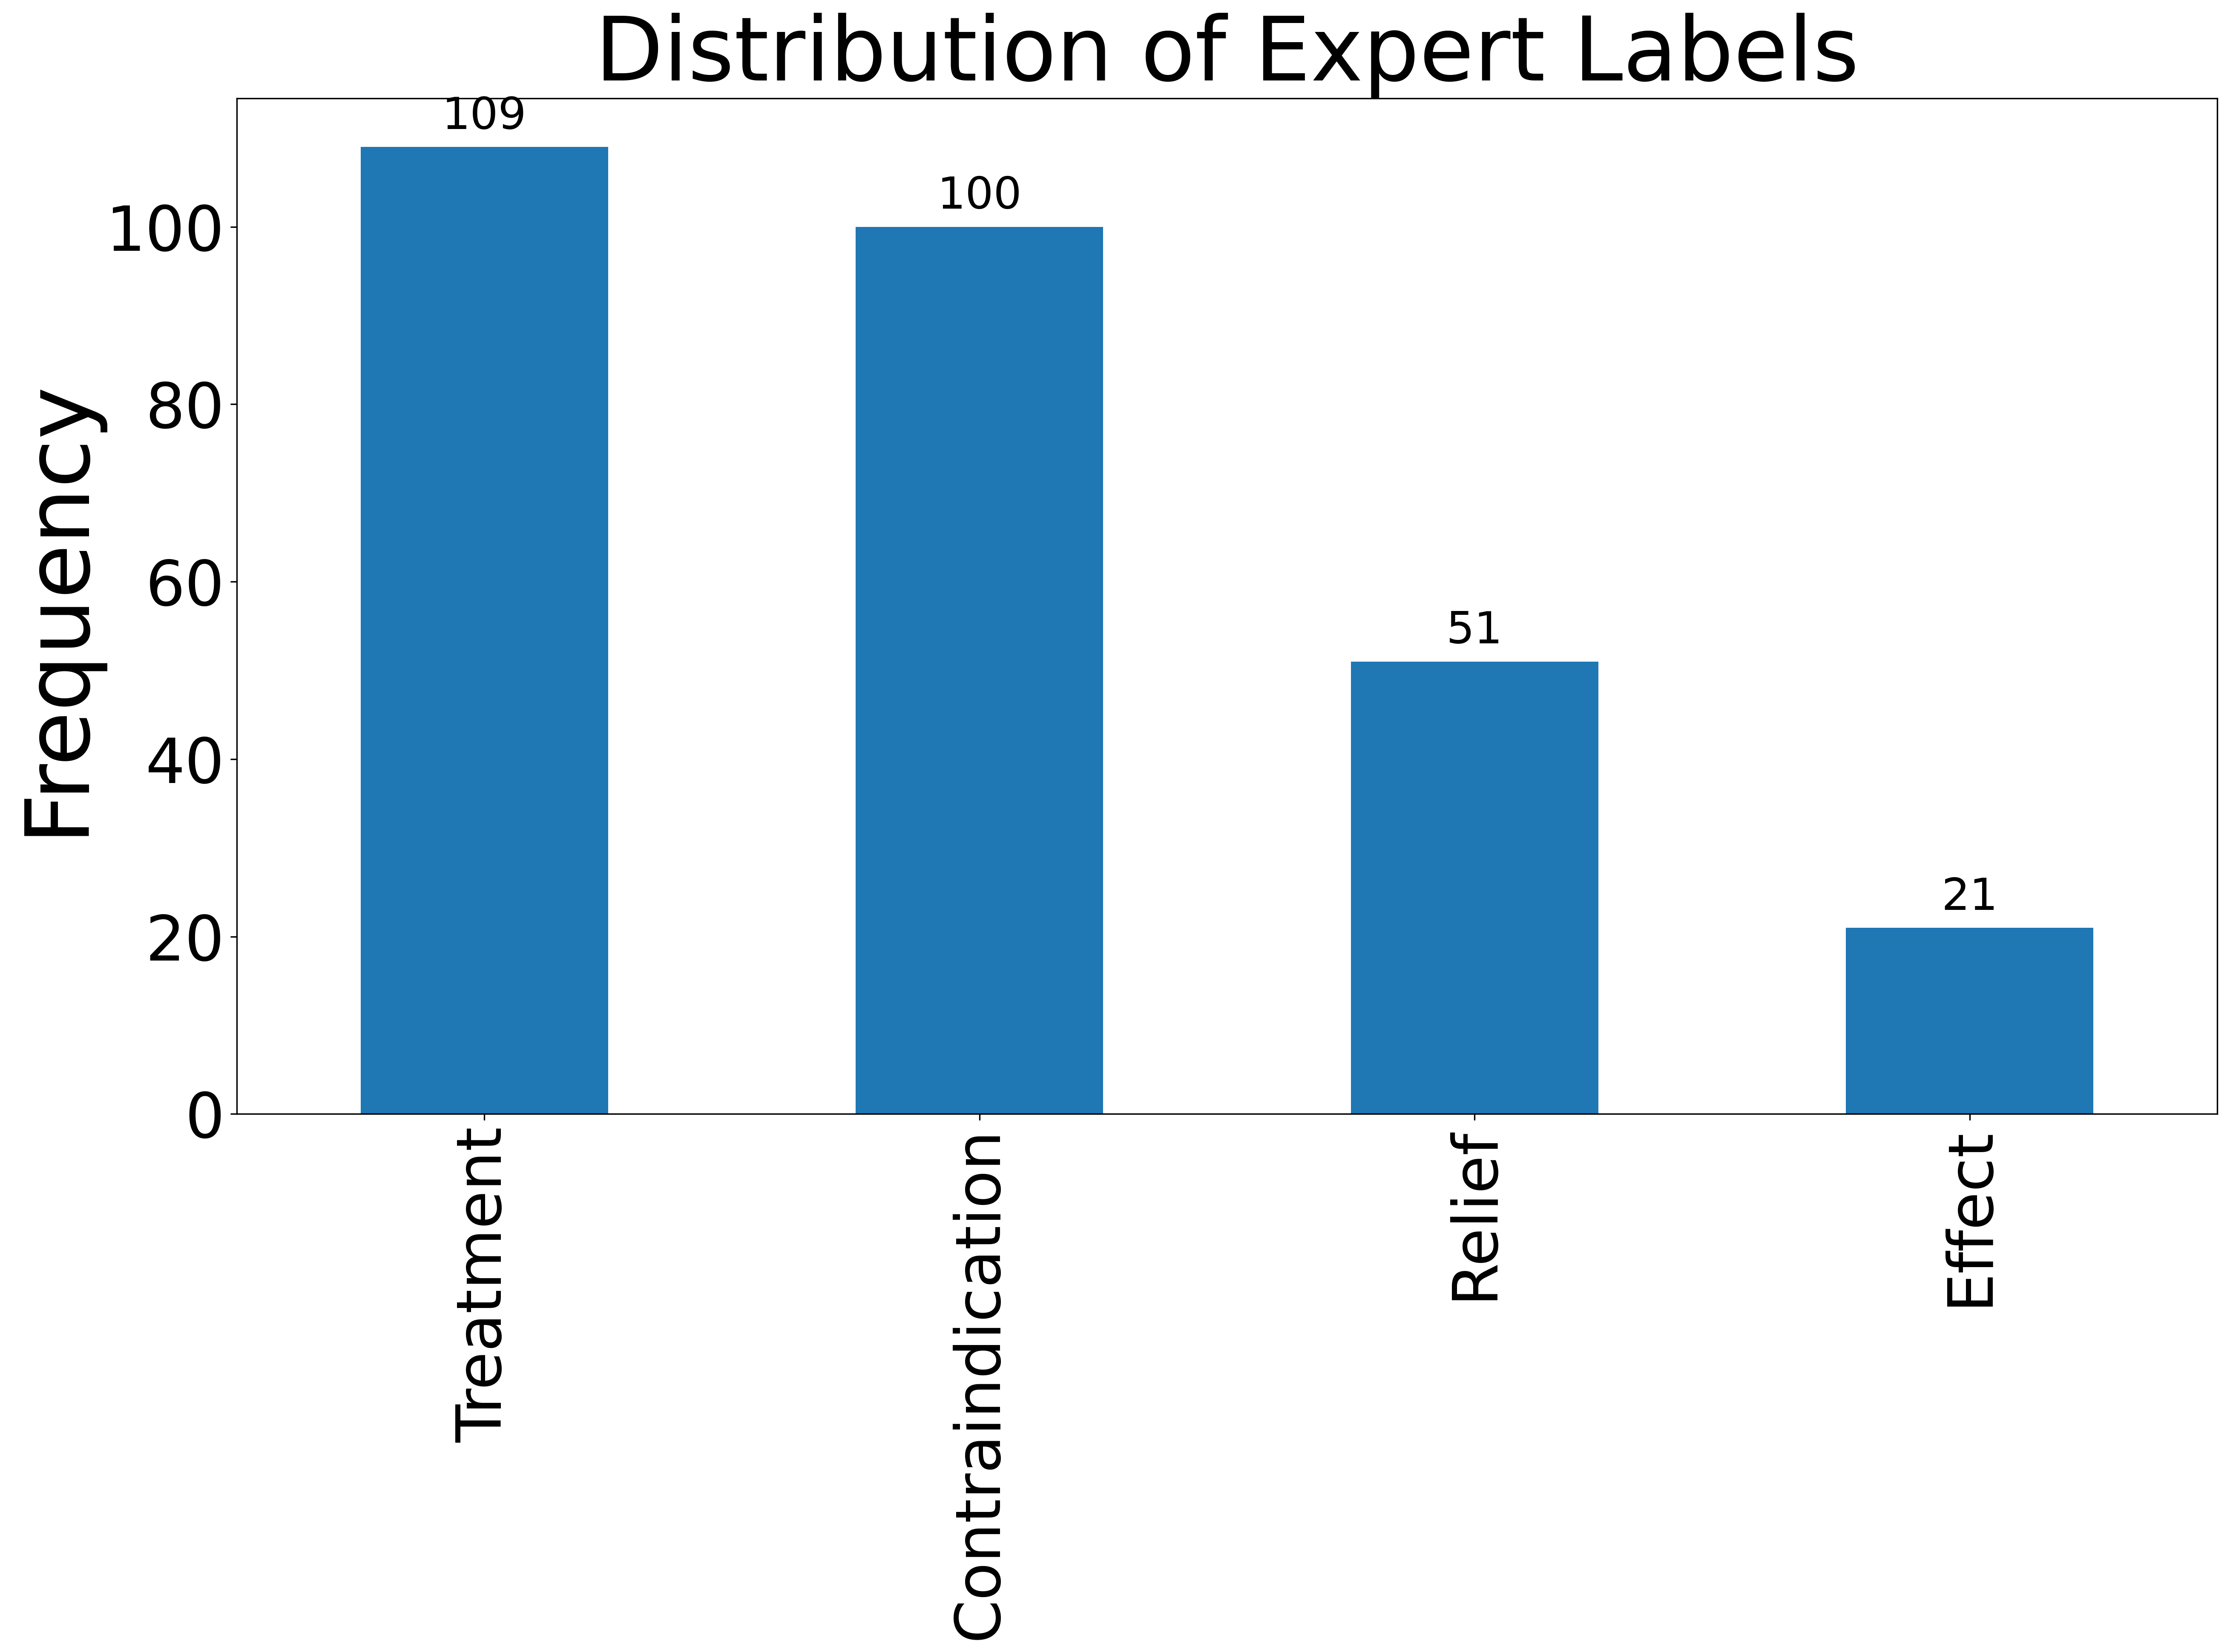

In [28]:

fig= plt.figure(figsize=(20,15),dpi=300)
x= match.expert_consensus.value_counts()
x.plot(kind='bar', legend=False)

plt.title('Distribution of Expert Labels', fontsize=50)
#plt.xlabel('Relation Labels', fontsize=56)
plt.xticks(fontsize=35)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=35)
ax = plt.gca()
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=25) 

#plt.gca().get_legend().remove()
plt.gcf().subplots_adjust(bottom=0.35)
fig.savefig('frequency.png')